In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv(r'Credit card transactions - India - Simple.csv')

In [6]:
df.head(10)

,index,City,Date,Card Type,Exp Type,Gender,Amount
0,0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475
1,1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555
2,2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738
3,3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424
4,4,"Bengaluru, India",5-May-15,Gold,Bills,F,171574
5,5,"Delhi, India",8-Sep-14,Silver,Bills,F,100036
6,6,"Delhi, India",24-Feb-15,Gold,Bills,F,143250
7,7,"Greater Mumbai, India",26-Jun-14,Platinum,Bills,F,150980
8,8,"Delhi, India",28-Mar-14,Silver,Bills,F,192247
9,9,"Delhi, India",1-Sep-14,Platinum,Bills,F,67932


In [7]:
df.columns

Index(['index', 'City', 'Date', 'Card Type', 'Exp Type', 'Gender', 'Amount'], dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26052 entries, 0 to 26051
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      26052 non-null  int64 
 1   City       26052 non-null  object
 2   Date       26052 non-null  object
 3   Card Type  26052 non-null  object
 4   Exp Type   26052 non-null  object
 5   Gender     26052 non-null  object
 6   Amount     26052 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 1.4+ MB


In [9]:
df.nunique()

index        26052
City           986
Date           600
Card Type        4
Exp Type         6
Gender           2
Amount       24972
dtype: int64

In [10]:
df.describe()

,index,Amount
count,26052.000000,26052.000000
mean,13025.500000,156411.537425
std,7520.708943,103063.254287
min,0.000000,1005.000000
25%,6512.750000,77120.250000
50%,13025.500000,153106.500000
75%,19538.250000,228050.000000
max,26051.000000,998077.000000


In [11]:
df.isnull().sum()
# there is no Null Values

index        0
City         0
Date         0
Card Type    0
Exp Type     0
Gender       0
Amount       0
dtype: int64

In [12]:
df.set_index('index', inplace = True)
df

,City,Date,Card Type,Exp Type,Gender,Amount
index,,,,,,
0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475
1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555
2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738
3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424
4,"Bengaluru, India",5-May-15,Gold,Bills,F,171574
...,...,...,...,...,...,...
26047,"Kolkata, India",22-Jun-14,Silver,Travel,F,128191
26048,"Pune, India",3-Aug-14,Signature,Travel,M,246316
26049,"Hyderabad, India",16-Jan-15,Silver,Travel,M,265019


In [13]:
# change the dtype of Date column to date time 
df['Date'] = pd.to_datetime(df['Date'])
df

C:\Users\suraj\AppData\Local\Temp\ipykernel_2880\3452064553.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


,City,Date,Card Type,Exp Type,Gender,Amount
index,,,,,,
0,"Delhi, India",2014-10-29,Gold,Bills,F,82475
1,"Greater Mumbai, India",2014-08-22,Platinum,Bills,F,32555
2,"Bengaluru, India",2014-08-27,Silver,Bills,F,101738
3,"Greater Mumbai, India",2014-04-12,Signature,Bills,F,123424
4,"Bengaluru, India",2015-05-05,Gold,Bills,F,171574
...,...,...,...,...,...,...
26047,"Kolkata, India",2014-06-22,Silver,Travel,F,128191
26048,"Pune, India",2014-08-03,Signature,Travel,M,246316
26049,"Hyderabad, India",2015-01-16,Silver,Travel,M,265019


In [14]:
# make the data more understandable
# change F to (Female) amd M to (Male)

df['Gender'] = df['Gender'].replace('F', 'Female')
df['Gender'] = df['Gender'].replace('M', 'Male')
df

,City,Date,Card Type,Exp Type,Gender,Amount
index,,,,,,
0,"Delhi, India",2014-10-29,Gold,Bills,Female,82475
1,"Greater Mumbai, India",2014-08-22,Platinum,Bills,Female,32555
2,"Bengaluru, India",2014-08-27,Silver,Bills,Female,101738
3,"Greater Mumbai, India",2014-04-12,Signature,Bills,Female,123424
4,"Bengaluru, India",2015-05-05,Gold,Bills,Female,171574
...,...,...,...,...,...,...
26047,"Kolkata, India",2014-06-22,Silver,Travel,Female,128191
26048,"Pune, India",2014-08-03,Signature,Travel,Male,246316
26049,"Hyderabad, India",2015-01-16,Silver,Travel,Male,265019


In [15]:
# split the city column to city and country columns

df[['city', 'country']] = df['City'].str.split(',', expand=True)
df

,City,Date,Card Type,Exp Type,Gender,Amount,city,country
index,,,,,,,,
0,"Delhi, India",2014-10-29,Gold,Bills,Female,82475,Delhi,India
1,"Greater Mumbai, India",2014-08-22,Platinum,Bills,Female,32555,Greater Mumbai,India
2,"Bengaluru, India",2014-08-27,Silver,Bills,Female,101738,Bengaluru,India
3,"Greater Mumbai, India",2014-04-12,Signature,Bills,Female,123424,Greater Mumbai,India
4,"Bengaluru, India",2015-05-05,Gold,Bills,Female,171574,Bengaluru,India
...,...,...,...,...,...,...,...,...
26047,"Kolkata, India",2014-06-22,Silver,Travel,Female,128191,Kolkata,India
26048,"Pune, India",2014-08-03,Signature,Travel,Male,246316,Pune,India
26049,"Hyderabad, India",2015-01-16,Silver,Travel,Male,265019,Hyderabad,India


In [16]:
# Grouping by 'Card Type' and calculating the mean amount spent for each card type
card_type = df.groupby('Card Type')['Amount'].mean()
print("Mean Amount Spent by Card Type:")
print(card_type)


# Grouping by 'Exp Type' and calculating the total amount spent in each expense category
expense_type = df.groupby('Exp Type')['Amount'].sum()
print("\nTotal Amount Spent by Expense Type:")
print(expense_type)


# Grouping by 'Gender' and calculating the total amount spent by each gender
gender = df.groupby('Gender')['Amount'].sum()
print("\nTotal Amount Spent by Gender:")
print(gender)


# Grouping by 'City' and calculating the total amount spent in each city
city = df.groupby('city')['Amount'].sum()
print("\nTotal Amount Spent in each City:")
print(city)


# Grouping by 'City' and 'Card Type' and calculating the mean amount spent for each combination
city_card = df.groupby(['city', 'Card Type'])['Amount'].mean()
print("\nMean Amount Spent by City and Card Type:")
print(city_card)

Mean Amount Spent by Card Type:
Card Type
Gold         154631.621800
Platinum     157492.813223
Signature    157133.721886
Silver       156376.273830
Name: Amount, dtype: float64

Total Amount Spent by Expense Type:
Exp Type
Bills            907072473
Entertainment    726437536
Food             824724009
Fuel             789135821
Grocery          718207923
Travel           109255611
Name: Amount, dtype: int64

Total Amount Spent by Gender:
Gender
Female    2205311030
Male      1869522343
Name: Amount, dtype: int64

Total Amount Spent in each City:
city
Achalpur     1606641
Adilabad     1769464
Adityapur     963993
Adoni        1575355
Adoor         647725
              ...   
Zaidpur       723818
Zamania       865634
Zira         1640547
Zirakpur      549663
Zunheboto     466429
Name: Amount, Length: 986, dtype: int64

Mean Amount Spent by City and Card Type:
city       Card Type
Achalpur   Gold         169998.0
           Platinum     178612.0
           Signature    182335.0
       

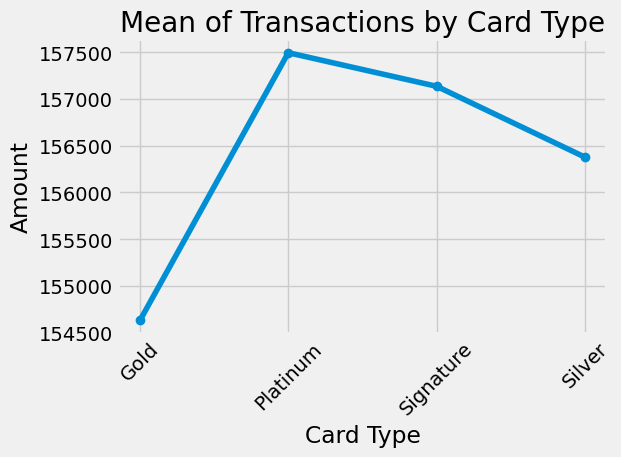

In [21]:
# line plot for mean of transactions depends on Card Type

plt.style.use('fivethirtyeight')

plt.plot(card_type.index, card_type, marker = 'o')

plt.xlabel('Card Type')
plt.ylabel('Amount')
plt.title('Mean of Transactions by Card Type')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability if needed
plt.tight_layout()  # Adjust the layout to prevent clipping of labels
plt.show()

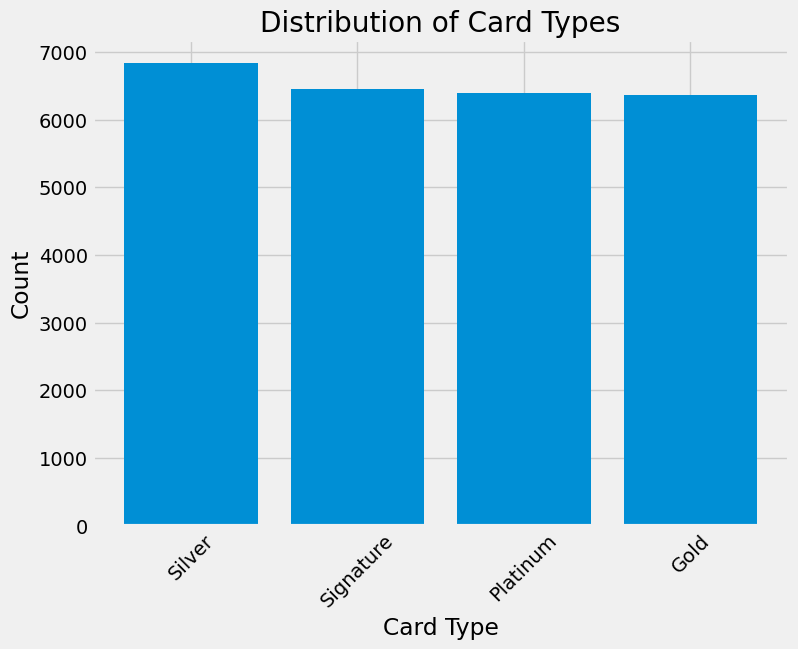

In [24]:
# bar chart for card types number of occurrences 

# Count the occurrences of each card type
card_type_counts = df['Card Type'].value_counts()


plt.figure(figsize=(8, 6))
plt.bar(card_type_counts.index, card_type_counts.values)
plt.xlabel('Card Type')
plt.ylabel('Count')
plt.title('Distribution of Card Types')
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x800 with 0 Axes>

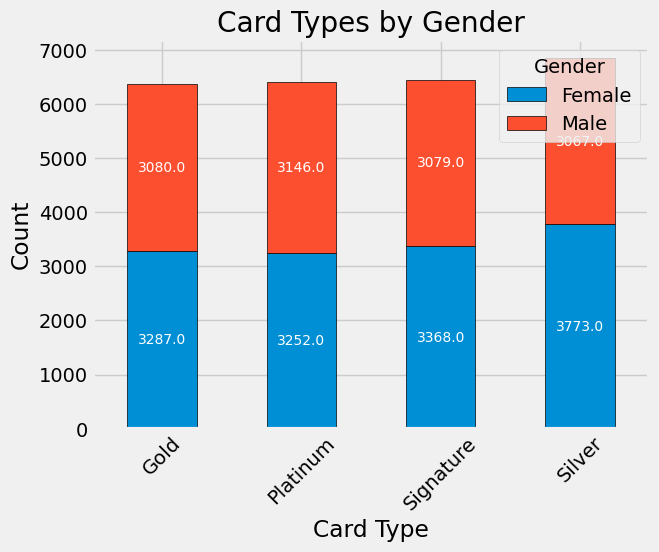

In [25]:
# Plot Stacked Bar Chart of Card Types by Gender

# Cross-tabulate Card Type and Gender
ct = pd.crosstab(df['Card Type'], df['Gender'])

plt.figure(figsize=(10, 8))
ax = ct.plot(kind='bar', stacked=True, edgecolor='k')

# Add the count values on top of each segment of the bars
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_y() + i.get_height() / 2, str(i.get_height()), 
            fontsize=10, color='white', ha='center', va='center')

plt.xlabel('Card Type')
plt.ylabel('Count')
plt.title('Card Types by Gender')
plt.xticks(rotation=45)
plt.legend(title='Gender', loc='upper right')
plt.show()

Total Amount Spent by Gender:
Gender
Female    2205311030
Male      1869522343
Name: Amount, dtype: int64


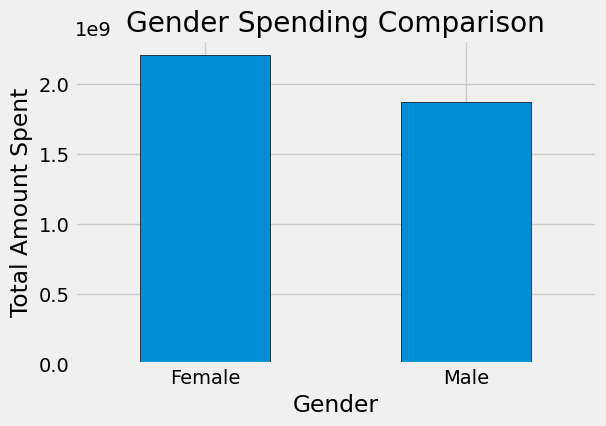

In [26]:
grouped_by_gender = df.groupby('Gender')['Amount'].sum()

# Displaying the total amount spent by each gender
print("Total Amount Spent by Gender:")
print(grouped_by_gender)

# Plotting the gender spending comparison as a bar plot
plt.figure(figsize=(6, 4))
grouped_by_gender.plot(kind='bar', edgecolor='k')
plt.xlabel('Gender')
plt.ylabel('Total Amount Spent')
plt.title('Gender Spending Comparison')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

In [29]:
# mean of transactions depends on Exp Type
exp_type = df.groupby('Exp Type')['Amount'].mean()
exp_type.sort_values()
exp_type

Exp Type
Bills            178627.899370
Entertainment    152548.831583
Food             150965.405272
Fuel             150111.436371
Grocery          151074.447413
Travel           148042.833333
Name: Amount, dtype: float64

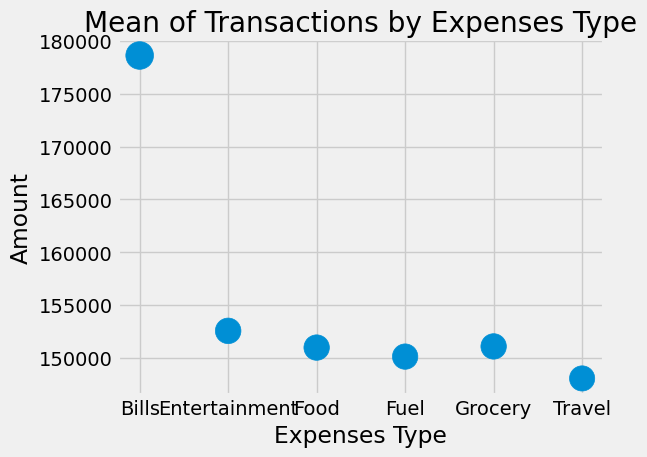

In [30]:
# scatter plot for mean of transactions depends on expensies Type

plt.style.use('fivethirtyeight')

plt.scatter(exp_type.index, exp_type, marker = 'o', s = exp_type/450)

plt.xlabel('Expenses Type')
plt.ylabel('Amount')
plt.title('Mean of Transactions by Expenses Type')
plt.xticks(rotation=0)  # Rotate x-axis labels for readability if needed
plt.tight_layout()  # Adjust the layout to prevent clipping of labels
plt.show()

Top Spending Categories:
Exp Type
Bills            907072473
Food             824724009
Fuel             789135821
Entertainment    726437536
Grocery          718207923
Travel           109255611
Name: Amount, dtype: int64


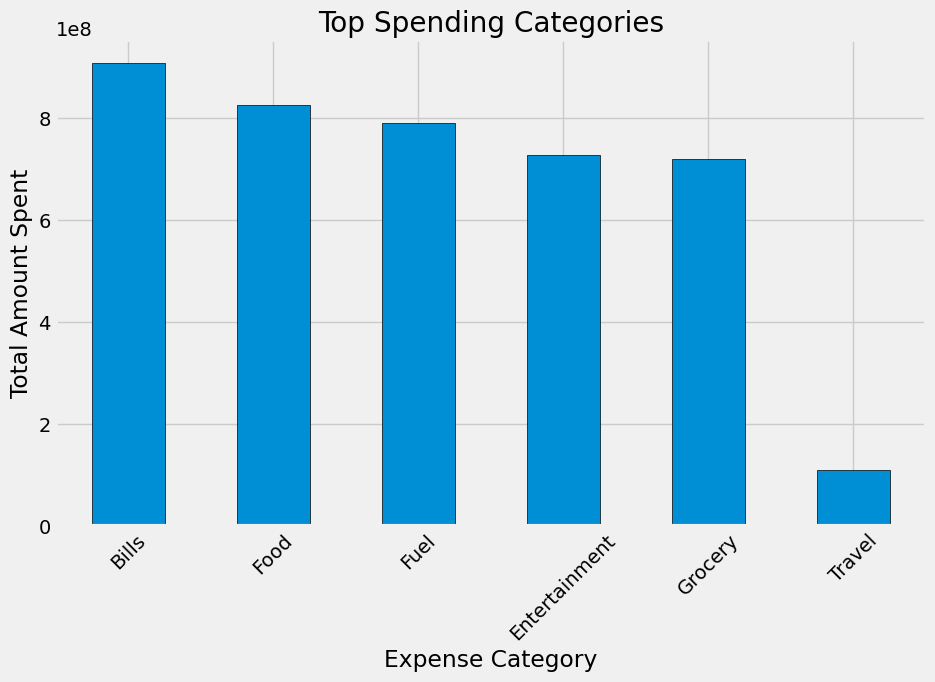

In [37]:
# bar plot for top spending Expense Category

grouped_by_expense_type = df.groupby('Exp Type')['Amount'].sum()
top_spending_categories = grouped_by_expense_type.sort_values(ascending=False)

# Displaying the top spending categories
print("Top Spending Categories:")
print(top_spending_categories)

# Plotting the top spending categories as a bar plot
plt.figure(figsize=(10, 6))
top_spending_categories.plot(kind='bar', edgecolor='k')
plt.xlabel('Expense Category')
plt.ylabel('Total Amount Spent')
plt.title('Top Spending Categories')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

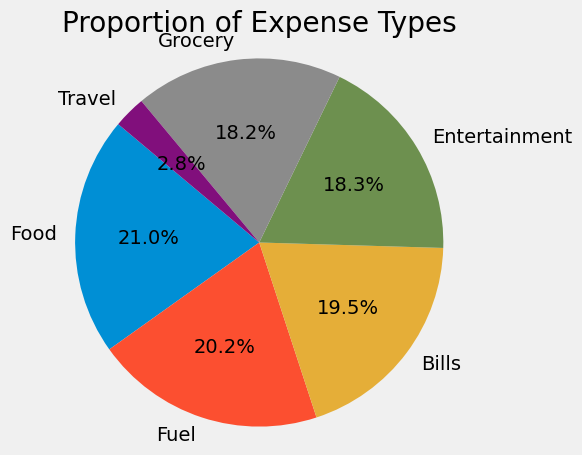

In [41]:
# pie chart for card types ( percent of occurrences )

# Count the occurrences of each expense type
expense_type_counts = df['Exp Type'].value_counts()


plt.figure(figsize=(5, 5))
plt.pie(expense_type_counts.values, labels=expense_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title(  'Proportion of Expense Types'  )
plt.show()

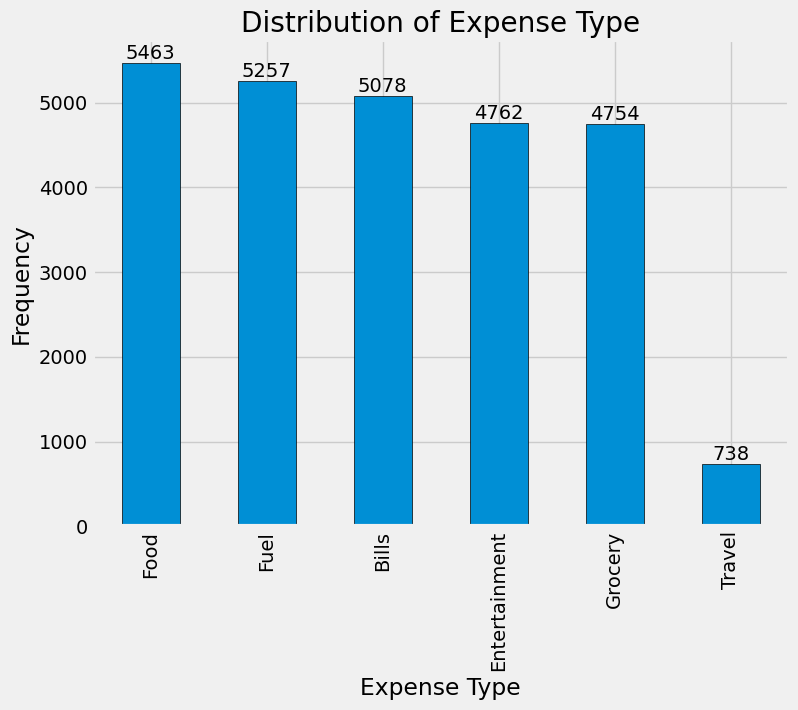

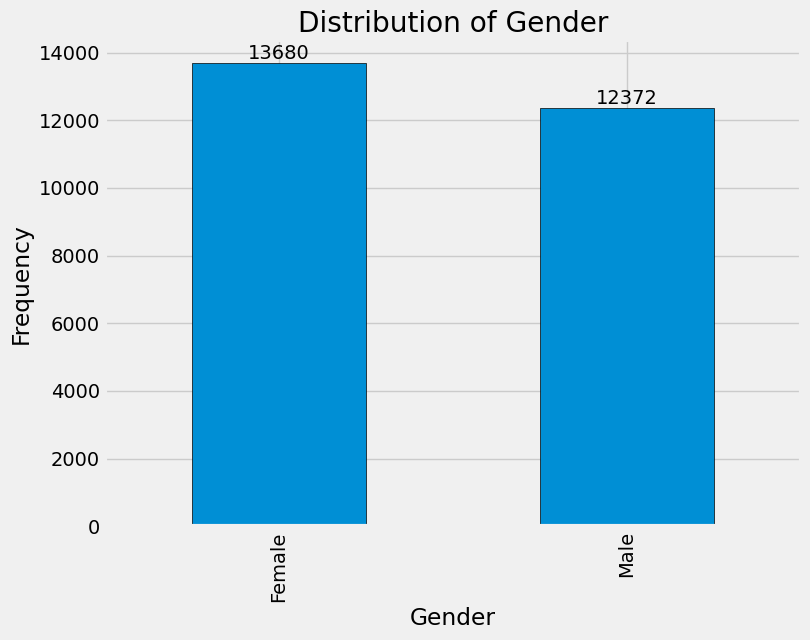

In [42]:
# Bar plot for Expense Type (Exp Type)
plt.figure(figsize=(8, 6))
expense_type_counts = df['Exp Type'].value_counts()
expense_type_counts.plot(kind='bar', edgecolor='k')

# Add the values on top of each bar
for index, value in enumerate(expense_type_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.xlabel('Expense Type')
plt.ylabel('Frequency')
plt.title('Distribution of Expense Type')
plt.show()


# Bar plot for Gender
plt.figure(figsize=(8, 6))
gender_counts = df['Gender'].value_counts()
gender_counts.plot(kind='bar', edgecolor='k')

# Add the values on top of each bar
for index, value in enumerate(gender_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Distribution of Gender')
plt.show()

In [44]:
# Haighest and lowest 10 cities in transctions by mean

high_city= df.groupby('city')['Amount'].mean().sort_values(ascending = False).head(10)
h_size = high_city
high_city

city
Thodupuzha      296684.000000
Nahan           264597.600000
Alwar           263488.666667
Manendragarh    257140.500000
Vellore         256179.000000
Kashipur        254690.750000
Rewari          253201.800000
Yadgir          249814.333333
Kadapa          249608.428571
Viramgam        246201.000000
Name: Amount, dtype: float64

In [45]:
low_city= df.groupby('city')['Amount'].mean().sort_values().head(10)
l_size = low_city
low_city

city
Bahraich         12126.500000
Fazilka          14949.000000
Mahbubnagar      15458.000000
Tirur            26094.000000
Thiruvalla       27841.333333
Changanassery    30074.000000
Solapur          43244.000000
Attingal         46810.000000
Nalbari          47660.500000
Panna            50782.000000
Name: Amount, dtype: float64

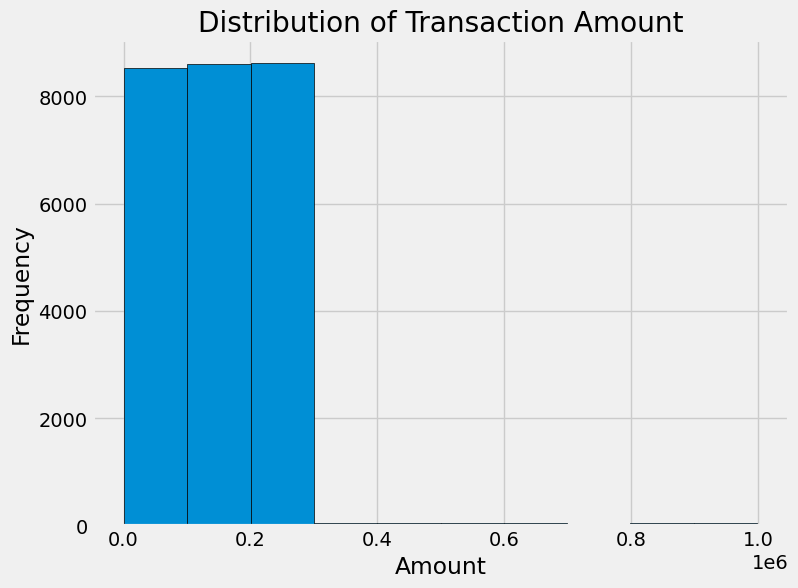

In [46]:
# Plot the histogram Distribution of Transaction Amount
plt.figure(figsize=(8, 6))
n_bins = 10
plt.hist(df['Amount'], bins=n_bins, edgecolor='black')

plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Amount')
plt.show()

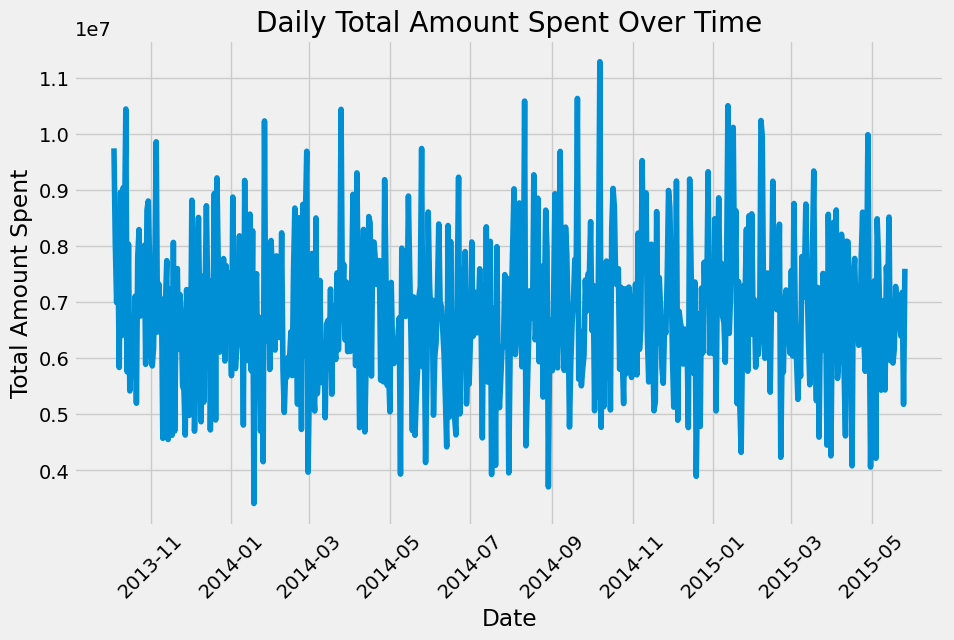

In [47]:
# line chart for total amount spent each Day

daily_spending = df.groupby('Date')['Amount'].sum()

plt.figure(figsize=(10, 6))
plt.plot(daily_spending.index, daily_spending.values)
plt.xlabel('Date')
plt.ylabel('Total Amount Spent')
plt.title('Daily Total Amount Spent Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

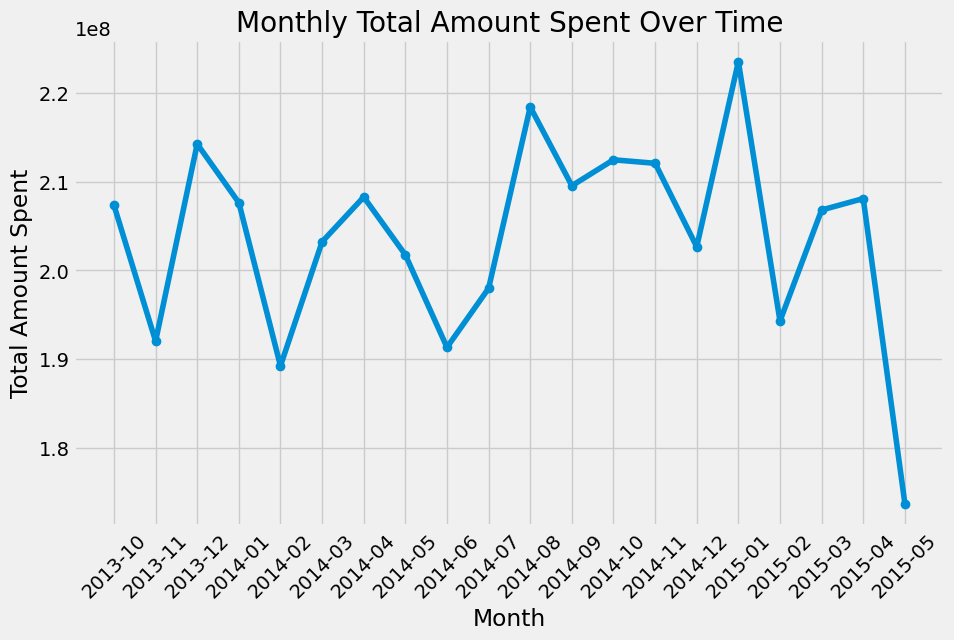

In [48]:
# line chart for total amount spent each Month
monthly_spending = df.groupby(df['Date'].dt.to_period('M'))['Amount'].sum()

# Convert the PeriodIndex to string format for plotting
monthly_spending.index = monthly_spending.index.astype(str)

plt.figure(figsize=(10, 6))
plt.plot(monthly_spending.index, monthly_spending.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Total Amount Spent')
plt.title('Monthly Total Amount Spent Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

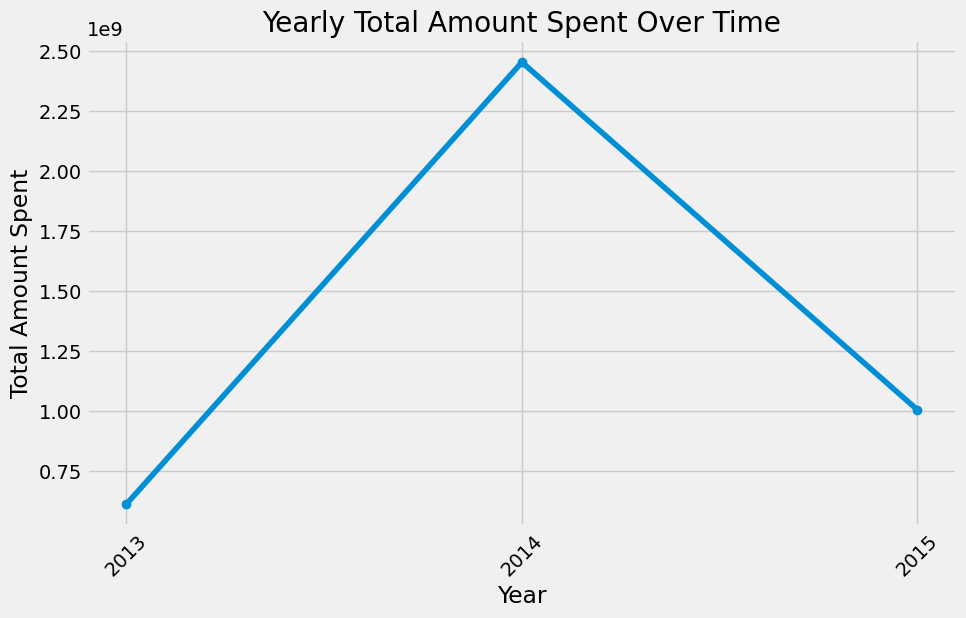

In [49]:
# line chart for total amount spent each year

yearly_spending = df.groupby(df['Date'].dt.year)['Amount'].sum()

plt.figure(figsize=(10, 6))
plt.plot(yearly_spending.index, yearly_spending.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Total Amount Spent')
plt.title('Yearly Total Amount Spent Over Time')
plt.xticks(yearly_spending.index, rotation=45)
plt.grid(True)
plt.show()

In [ ]:
# End 